## 객체 지향 퍼셉트론 api 

In [20]:
import numpy as np

class perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter =50 , random_state =1 ):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0 ,scale = 0.01,
                            size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0 
            for xi , target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X , self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 , 1, -1)

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header = None)

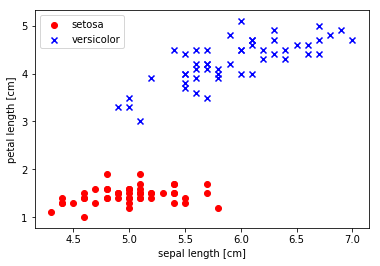

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)

X = df.iloc[0:100 , [0,2]].values

plt.scatter(X[:50, 0], X[:50,1] ,
           color= 'red' , marker = 'o' , label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

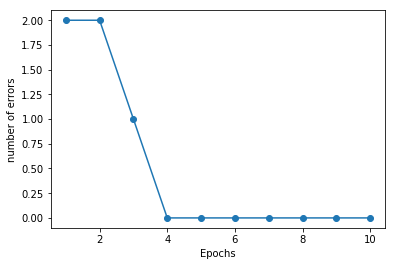

In [22]:
ppn = perceptron(eta = 0.1 , n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('number of errors')
plt.show()

In [23]:
from matplotlib.color import ListedColormap

def plot_decision_regions(X,y classifier , resolution = 0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = [:,0 ].min() - 1 ,X[:,0].max() + 1
    x2_min , x2_max = [:,1 ].min() - 1 ,X[:,1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution),
                           np.arrange(x2_min , x2_max , resolution))
    Z = classifier.predict(np.array([xx1.ravel( ), x22.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 ,Z , alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    

SyntaxError: invalid syntax (<ipython-input-23-ed07a330c28f>, line 3)